<a href="https://colab.research.google.com/github/natdebandi/hate_speech_ar/blob/main/pandemic_hate_speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP final - reconocimiento de discursos discriminatorios en Twitter

**Natalia Dedandi**

En esta noebook se realizan pruebas

In [ ]:
!pip install datasets seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset
import pandas as pd

ds1 = load_dataset("piuba-bigdata/contextualized_hate_speech")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/107M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.52M [00:00<?, ?B/s]

dev-00000-of-00001.parquet:   0%|          | 0.00/26.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/36420 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11343 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/9106 [00:00<?, ? examples/s]

In [ ]:
ds1

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 36420
    })
    test: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 11343
    })
    dev: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 9106
    })
})

In [ ]:
    train_df = pd.DataFrame(ds1['train'])
    test_df = pd.DataFrame(ds1['test'])
    dev_df = pd.DataFrame(ds1['dev'])
    combined_df = pd.concat([train_df, test_df, dev_df], ignore_index=True)

In [ ]:

total_tw = len(combined_df)
total_tw


56869

In [ ]:
# prompt: calcluar para cada feature de combined_df la cantidad de 1 y crear un DF con el nombre del feature y el valor calculado
variables = ['HATEFUL', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL']
feature_ones_count = {}
for var in variables:
  feature_ones_count[var] = combined_df[var].value_counts().get(1, 0)

#for col in variables:
#    feature_ones_count[col] = combined_df[col].value_counts().get(1, 0)

labels_count = pd.DataFrame(list(feature_ones_count.items()), columns=['Feature', 'Ones_Count'])
labels_count

,Feature,Ones_Count
0,HATEFUL,8715
1,CALLS,1451
2,WOMEN,1332
3,LGBTI,818
4,RACISM,2469
5,CLASS,823
6,POLITICS,1428
7,DISABLED,580
8,APPEARANCE,1803
9,CRIMINAL,1642


In [ ]:
labels_count['Total_Tweets'] = total_tw #added this line
labels_count

,Feature,Ones_Count,Total_Tweets
0,HATEFUL,8715,56869
1,CALLS,1451,56869
2,WOMEN,1332,56869
3,LGBTI,818,56869
4,RACISM,2469,56869
5,CLASS,823,56869
6,POLITICS,1428,56869
7,DISABLED,580,56869
8,APPEARANCE,1803,56869
9,CRIMINAL,1642,56869


In [ ]:
# prompt: calculate % of ones_count   over total_tweets of labels_count

labels_count['Percentage'] = (labels_count['Ones_Count'] / labels_count['Total_Tweets']) * 100
labels_count

,Feature,Ones_Count,Total_Tweets,Percentage
0,HATEFUL,8715,56869,15.324694
1,CALLS,1451,56869,2.551478
2,WOMEN,1332,56869,2.342225
3,LGBTI,818,56869,1.438394
4,RACISM,2469,56869,4.341557
5,CLASS,823,56869,1.447186
6,POLITICS,1428,56869,2.511034
7,DISABLED,580,56869,1.019888
8,APPEARANCE,1803,56869,3.170444
9,CRIMINAL,1642,56869,2.887338


In [ ]:
labels_count.to_csv('labels_count.csv', index=False)

In [ ]:
# Filter the DataFrame where 'CALLS' is True
calls_true_df = combined_df[combined_df['CALLS'] == True]

# Check if there are at least 10 rows that meet the condition. If not, it gives an error.
if len(calls_true_df) < 15:
    raise ValueError("There are less than 10 rows where 'CALLS' is True in the DataFrame")

# Sample 10 random rows
random_rows = calls_true_df.sample(n=15)

# Display the random rows
random_rows

,id,title,text,context_tweet,HATEFUL,body,CALLS,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL
47035,352321,Coronavirus: la ONU pide reducir la población ...,"@usuario Genial,suuur paredon y despuuues!!! P...",Coronavirus: la ONU pide reducir la población ...,1,La Alta Comisionada de la ONU para los Derecho...,1,0,0,0,0,0,0,0,1
17691,375951,La nueva vida en la cárcel de los rugbiers acu...,@usuario Que se pudran en la cárcel.,La nueva vida en la cárcel de los rugbiers acu...,1,"Los presos los habían marcado al comienzo. ""No...",1,0,0,0,0,0,0,0,1
55479,350222,"""Mientras ustedes estén en el techo no se pued...",@usuario pum pum pum... negociacion terminada...,"""Mientras ustedes estén en el techo no se pued...",1,"""Mientras ustedes estén en el techo no se pued...",1,0,0,0,0,0,0,0,1
12480,337328,"Por la crisis del coronavirus, ciudadanos boli...",@usuario Me canse @usuario ... cierren todo y ...,"Por la crisis del coronavirus, ciudadanos boli...",1,La foto impacta. Un ciudadano boliviano ingres...,1,0,0,1,0,0,0,0,0
23129,335381,Video: el hijo de un contador mató a balazos a...,@usuario Excelente. Todos deberíamos poner en ...,El hijo de un contador mató a balazos a un lad...,1,La curva ni siquiera llegó a aplanarse. Todo l...,1,0,0,0,0,0,0,0,1
45332,367671,"""No me curen, quiero morir"": Jaz la pequeña de...",@usuario El mundo estará en paz cuando limpien...,"“No me curen, quiero morir”: Jaz, la pequeña d...",1,"Jaz, una niña de 7 años, se encuentra hospital...",1,0,0,0,0,0,0,0,1
12179,337011,El engaño de China al mundo fue peor: pruebas ...,@usuario SON LOS PEORES QUE TOMEN MEDIDAS CON ...,El engaño de China al mundo fue peor: pruebas ...,1,El ocultamiento por parte del régimen chino ac...,1,0,0,1,0,0,0,0,0
43514,393801,Acusaron a un refugio para animales en China d...,@usuario Los chinos deberían extinguirse,Un refugio para animales en China habría vendi...,1,Un refugio para animales silvestres afiliado a...,1,0,0,1,0,0,0,0,0
40540,336556,Detuvieron a otro delincuente recientemente li...,@usuario Hay q matar negroides y jueces,Detuvieron a un delincuente recientemente libe...,1,Así era detenido otro delincuente que reciente...,1,0,0,1,0,0,0,0,1
52909,346786,"Ahora China emite alerta de viaje contra ""país...",@usuario Se merecen una bomba atomica,"Ahora China emite alerta de viaje contra ""país...",1,Con la pandemia de coronavirus en plena expans...,1,0,0,1,0,0,0,0,0


In [ ]:
random_rows = random_rows[['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL']]
random_rows.to_csv('example.csv', index=False)

### Aplicacion de GPT binario sin contexto



In [ ]:
#me quedo con las columnas par
df_hateful=df_sample[['text', 'HATEFUL']]
df_hateful

,text,HATEFUL
24752,@usuario En toda desgracia siempre hay benefic...,0
3004,@usuario Hay q ser especialista para poder dar...,0
29851,@usuario Puede hablar el gordo drogadicto toda...,1
21119,@usuario Medios de mierda deja de vender humo ...,0
26686,"@usuario A ver, Tinelli se cago en la cuarente...",0
...,...,...
17565,@usuario Que a nadie se le ocurra llamar a los...,0
28123,@usuario Por alcahuete.,0
21196,@usuario Pero ya está detenido devuelta. El be...,0
21860,@usuario Gorda nefasta....no entiendo quien le...,1


Le aplico al tweet la funcion de sentimiento. Solo analizo el tweet sin contexto

In [ ]:
  df_hateful['sentiment'] = df_hateful['text'].apply(sentiment_analysis)


<ipython-input-12-c2d02d48150b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hateful['sentiment'] = df_hateful['text'].apply(sentiment_analysis)


In [ ]:
df_hateful.groupby(['sentiment']).size()


sentiment
hateful                          8
no es odioso.                    9
no es un comentario de odio.     3
no es un comentario odioso.      2
no es un mensaje de odio.        5
no hateful                       1
no odioso                       90
no odioso.                      18
odioso                          63
odioso.                          1
dtype: int64

In [ ]:
import numpy as np

## ajustar los valores y crear una variable binaria entera 1 y 0
df_hateful['sentiment_bin'] = df_hateful['sentiment'].apply(lambda x: 1 if (x == 'odioso' or x=='hateful' or x=='odioso.') else 0)
#df_hateful['sentiment_bin'] = df_hateful['sentiment'].apply(lambda x: 1 if x == 'odioso' else 0)
df_hateful.groupby(['sentiment_bin']).size()



<ipython-input-14-a0c555e65dba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hateful['sentiment_bin'] = df_hateful['sentiment'].apply(lambda x: 1 if (x == 'odioso' or x=='hateful' or x=='odioso.') else 0)


sentiment_bin
0    128
1     72
dtype: int64

<ipython-input-15-14ca81176c55>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_hateful, x='HATEFUL', y='sentiment_bin', inner='stick', palette='Dark2')


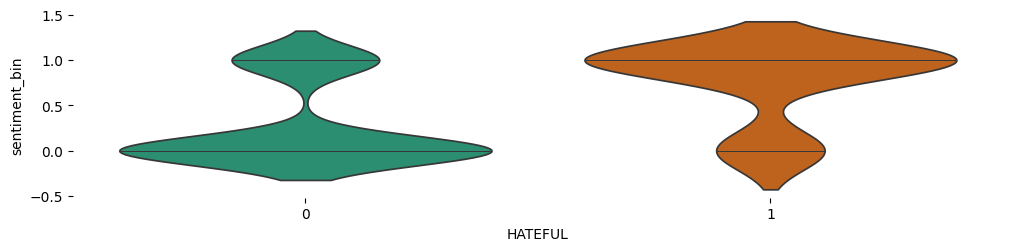

In [ ]:
# @title sentiment_column vs HATEFUL

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_hateful['sentiment_bin'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_hateful, x='HATEFUL', y='sentiment_bin', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def compare_model_predictions(y_true, y_pred, problem_type='classification'):
    metrics = {}

    if problem_type == 'classification':
        metrics['Accuracy'] = accuracy_score(y_true, y_pred)
        metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
        metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
        metrics['f1'] = f1_score(y_true, y_pred, average='weighted')
        print('metrix')
        print(metrics)

In [ ]:
#df_train_sample

#import numpy as np
# Applying the condition using apply and lambda
#df_train_sample['sentiment_bin'] = df_train_sample['sentiment_column'].apply(lambda x: 1 if x == 'odioso' else 0)

In [ ]:
metrics=compare_model_predictions(df_hateful['HATEFUL'],df_hateful['sentiment_bin'])

metrix
{'Accuracy': 0.725, 'Precision': 0.8504557291666667, 'Recall': 0.725, 'f1': 0.7607515282272564}


USAR GPT PARA CLASIFICACION DE MUCHAS ETIQUETAS

In [ ]:
df_sample
df_sample[df_sample['HATEFUL'] == 1]



,id,title,text,context_tweet,HATEFUL,body,CALLS,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL
29851,368623,"Jorge Lanata: ""Alberto Fernández está funciona...",@usuario Puede hablar el gordo drogadicto toda...,"Lanata: ""Hoy Alberto está funcionando como el ...",1,"""Lo que más me preocupa es que el Gobierno no ...",0,0,0,0,0,0,1,1,0
13539,385786,"Escándalo en Italia por los ""cementerios de ab...","@usuario Cual es el problema, ahora las aborte...",Escándalo en Italia por los “cementerios de ab...,1,"""No te preocupes aunque no te hayas apuntado p...",0,1,0,0,0,0,0,0,0
27618,364330,"""Me quiero matar"", la carta del preso que qued...","@usuario Jajaja... perdón, poooobre","""Me quiero matar"", la carta del preso que qued...",1,María miraba una película en Netflix cuando se...,0,0,0,0,0,0,0,0,1
11566,351116,Florencia Peña se diferenció de los argentinos...,@usuario Petera vieja.,Florencia Peña se diferenció de los argentinos...,1,La hostilidad del actual mercado laboral y el ...,0,1,0,0,0,0,0,1,0
26240,377589,Roberto Baradel dijo que las protestas policia...,@usuario Cállese hombre horrible,Roberto Baradel dijo que las protestas policia...,1,El gremialista Roberto Baradel aseguró este ma...,0,0,0,0,0,0,0,1,0
33884,371661,"Juan Grabois: ""Hay una oleada de toma de tierr...",@usuario Que bueno más bolitas y peruanos haci...,"Juan Grabois: ""Hay una oleada de toma de tierr...",1,"Juan Grabois: ""Hay una oleada de toma de tierr...",0,0,0,1,0,0,0,0,0
16279,386019,El ex presidente uruguayo José Mujica anunció ...,@usuario Está agotado el tupamaro! La política...,El ex presidente uruguayo José Mujica anunció ...,1,El ex presidente uruguayo José Mujica (2010-20...,0,0,0,0,0,1,0,1,0
19772,345395,Coronavirus en China: la ciudad de Shenzhen pr...,@usuario habrá alguna manera de erradicar a es...,Coronavirus en China: la ciudad de Shenzhen pr...,1,"Shenzhen, una de las mayores ciudades de China...",1,0,0,1,0,0,0,0,0
30974,364205,"Diego Maradona les responde a sus hijas: ""Dalm...","@usuario Hablo el ejemplo de padre, falopero, ...","Diego Maradona les responde a sus hijas: ""Dalm...",1,"Mañana de domingo, casi mediodía. El más ilust...",0,0,0,0,0,0,1,1,0
34018,366472,"Juana Viale: ""Alberto Fernández parece más un ...",@usuario Tira goma..,"Juana Viale: ""Fernández parece más un vocero q...",1,"La indignación de Juana Viale: ""Siento que la ...",0,1,0,0,0,0,0,0,0


In [ ]:


def sentiment_analysis_multiple(text):

    # Call the OpenAI API to generate a response
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": f"""
            You must classify a text with one or more of the following labels: Label WOMEN discrimination against women, label LGBTI gender discrimination, specifically against gays, lesbians or transsexuals,
            label RACISM is racism, or discrimination against people according to their skin color,label CLASS is discrimination for being poor or living in a marginal or poor place,
             label POLITICS is hatred of politicians, label DISABLED is discrimination against people with disabilities, label APPEARENCE is discrimination against people because
             of their physical appearance, specifically fatphobia, label CRIMINAL is discrimination against people because of a criminal record or links to criminality and label CALLS is hateful text that incites violence
             If the text is not hatefull indicate label NOT HATEFUL"""},
            {"role": "user", "content": text}
        ],
        max_tokens=100,  # Limit response to a single word
        temperature=0  # Keep response consistent
    )

    # Extract the sentiment from the response
    sentiment = response.choices[0].message.content.strip().lower()

    return sentiment

# Example usage
input_text = "Que el EVO se vaya a su país"
sentiment = sentiment_analysis_multiple(input_text)
print(input_text, "Sentiment is:", sentiment)

Que el EVO se vaya a su país Sentiment is: label politics


In [ ]:
  df_multiple=df_sample
  df_multiple['sentiment'] = df_multiple['text'].apply(sentiment_analysis_multiple)

In [ ]:
 df_multiple

,id,title,text,context_tweet,HATEFUL,body,CALLS,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL,sentiment
24752,348243,Nancy Pazos reveló por qué decidió que su mamá...,@usuario En toda desgracia siempre hay benefic...,Nancy Pazos reveló por qué decidió que su mamá...,0,"Nancy Pazos contó, este lunes a primera hora, ...",0,0,0,0,0,0,0,0,0,not hateful
3004,365241,Opinan los especialistas: ¿por qué los jóvenes...,@usuario Hay q ser especialista para poder dar...,Opinan los especialistas: ¿por qué los jóvenes...,0,La historia argentina está signada por la inmi...,0,0,0,0,0,0,0,0,0,not hateful
29851,368623,"Jorge Lanata: ""Alberto Fernández está funciona...",@usuario Puede hablar el gordo drogadicto toda...,"Lanata: ""Hoy Alberto está funcionando como el ...",1,"""Lo que más me preocupa es que el Gobierno no ...",0,0,0,0,0,0,1,1,0,label appearance
21119,380655,"Tren Roca: no tenía permiso para viajar, insul...",@usuario Medios de mierda deja de vender humo ...,#VIDEO Tren Roca: no tenía permiso para circul...,0,Un violento episodio habría tenido lugar el pa...,0,0,0,0,0,0,0,0,0,label politics
26686,351838,Alberto Fernández criticó a Susana Giménez y d...,"@usuario A ver, Tinelli se cago en la cuarente...",🔴 AHORA | Alberto Fernández criticó a Susana G...,0,"Alberto Fernández apoyó a Marcelo Tinelli, con...",0,0,0,0,0,0,0,0,0,label: politics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20822,357740,"Elisa Carrió: ""Cristina no fue presa porque el...","@usuario Está mal. Defender la República, no e...",Elisa Carrió y un mensaje a la interna de Camb...,0,La ex diputada nacional y líder de la Coalició...,0,0,0,0,0,0,0,0,0,label not hateful
9675,396931,El fuerte reclamo de Milagro Sala al Gobierno ...,@usuario epa epa qué pasa milagritos no te est...,El fuerte reclamo de Milagro Sala al Gobierno ...,0,A horas de cumplir cinco años de prisión por v...,0,0,0,0,0,0,0,0,0,label not hateful
13262,376770,Brucelosis en China: se escapó una bacteria de...,@usuario ESTOS CHINOS HDMP QUIEREN VOLTEAR EL ...,Se escapó una bacteria de un laboratorio en Ch...,1,Más de 3.000 personas en el noroeste de China ...,0,0,0,1,0,0,0,0,0,label racism
33916,383394,Coronavirus en Argentina: Cuba busca intercamb...,@usuario Tenemos gente a la que les jode que v...,Coronavirus en Argentina: Cuba busca intercamb...,0,Cuba suele cobrar el servicio de sus médicos e...,0,0,0,0,0,0,0,0,0,label: politics


In [ ]:
df_multiple.groupby(['sentiment']).size()

sentiment
label appearance                      2
label calls                           3
label class                           3
label lgbti gender discrimination     1
label not hateful                    23
label politics                        9
label racism                          3
label women                           2
label: appearance                     3
label: calls                          3
label: class                          1
label: criminal                       3
label: not hateful                    5
label: politics                       6
not hateful                          33
dtype: int64

Asigno manualmente las posibles respuestas a etiquetas o y 1 de columnas de prediccion de cada etiqueta original

In [ ]:
ds1

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 36420
    })
    test: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 11343
    })
    dev: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 9106
    })
})

In [ ]:
import re

def word_in_text(word, text):
    # Use re.search() to find the word in the text
    pattern = r'\b{}\b'.format(re.escape(word))  # \b matches word boundaries
    match = re.search(pattern, text, flags=re.IGNORECASE)  # Ignore case for case-insensitive matching

    if match:
        return True
    else:
        return False

In [ ]:
## ajustar los valores y crear una variable binaria entera 1 y 0
df_multiple['CALLS_pred'] = df_multiple['sentiment'].apply(lambda x: 1 if word_in_text('calls',x) else 0)
df_multiple['WOMEN_pred'] = df_multiple['sentiment'].apply(lambda x: 1 if word_in_text('women',x) else 0)
df_multiple['LGBTI_pred'] = df_multiple['sentiment'].apply(lambda x: 1 if word_in_text('lgbti',x) else 0)
df_multiple['RACISM_pred'] = df_multiple['sentiment'].apply(lambda x: 1 if word_in_text('racism',x) else 0)
df_multiple['CLASS_pred'] = df_multiple['sentiment'].apply(lambda x: 1 if word_in_text('class',x) else 0)
df_multiple['POLITICS_pred'] = df_multiple['sentiment'].apply(lambda x: 1 if word_in_text('politics',x) else 0)
df_multiple['DISABLED_pred'] = df_multiple['sentiment'].apply(lambda x: 1 if word_in_text('disabled',x) else 0)
df_multiple['APPEARENCE_pred'] = df_multiple['sentiment'].apply(lambda x: 1 if word_in_text('appearance',x) else 0)
df_multiple['CRIMINAL_pred'] = df_multiple['sentiment'].apply(lambda x: 1 if word_in_text('criminal',x) else 0)


In [ ]:
#creo la columna de prediccion de odio general con la union de las etiquetas
df_multiple['HATEFUL_pred']= df_multiple[['CALLS_pred','WOMEN_pred','LGBTI_pred','RACISM_pred','CLASS_pred','POLITICS_pred','DISABLED_pred','APPEARENCE_pred','CRIMINAL_pred']].max(axis=1)

df_multiple.groupby(['HATEFUL_pred']).size()

HATEFUL_pred
0    61
1    39
dtype: int64

In [ ]:
compare_model_predictions(df_multiple['HATEFUL'],df_multiple['HATEFUL_pred'])

metrix
{'Accuracy': 0.66, 'Precision': 0.796309373686423, 'Recall': 0.66, 'f1': 0.700813492063492}


In [ ]:
ds1

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 36420
    })
    test: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 11343
    })
    dev: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 9106
    })
})

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss
from sklearn.preprocessing import MultiLabelBinarizer

# Example data (replace with your actual data)
y_true = [df_multiple['CALLS'], df_multiple['WOMEN'], df_multiple['LGBTI'], df_multiple['RACISM'], df_multiple['CLASS'], df_multiple['POLITICS'], df_multiple['DISABLED'], df_multiple['APPEARANCE'], df_multiple['CRIMINAL']]
y_pred = [df_multiple['CALLS_pred'], df_multiple['WOMEN_pred'], df_multiple['LGBTI_pred'], df_multiple['RACISM_pred'], df_multiple['CLASS_pred'], df_multiple['POLITICS_pred'], df_multiple['DISABLED_pred'], df_multiple['APPEARENCE_pred'], df_multiple['CRIMINAL_pred']]

# Convert labels to binary representation
mlb = MultiLabelBinarizer()
y_true_bin = mlb.fit_transform(y_true)
y_pred_bin = mlb.transform(y_pred)

# Accuracy
accuracy = accuracy_score(y_true_bin, y_pred_bin)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_true_bin, y_pred_bin, average='samples')
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_true_bin, y_pred_bin, average='samples')
print(f'Recall: {recall:.2f}')

# F1 score
f1 = f1_score(y_true_bin, y_pred_bin, average='samples')
print(f'F1 score: {f1:.2f}')




Accuracy: 0.78
Precision: 0.94
Recall: 0.94
F1 score: 0.93
